### UPWORK's JOB TRENDS ANALYSIS


In [83]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [84]:
df=pd.read_csv('upwork-jobs.csv')

### 1. Data Exploration

In [85]:
print("Summary Statistics:\n", df.describe())

Summary Statistics:
          hourly_low   hourly_high          budget
count  22956.000000  22161.000000    21873.000000
mean      17.467895     41.608050      746.263521
std       18.228234     47.968562    10639.241140
min        3.000000      3.000000        5.000000
25%        8.000000     20.000000       30.000000
50%       15.000000     30.000000      100.000000
75%       20.000000     50.000000      300.000000
max      500.000000    999.000000  1000000.000000


In [86]:
df.head(2)


,title,link,description,published_date,is_hourly,hourly_low,hourly_high,budget,country
0,Experienced Media Buyer For Solar Pannel and R...,https://www.upwork.com/jobs/Experienced-Media-...,We’re looking for a talented and hardworking a...,2024-02-17 09:09:54+00:00,False,NaN,NaN,500.0,NaN
1,Full Stack Developer,https://www.upwork.com/jobs/Full-Stack-Develop...,Job Title: Full Stack DeveloperWe are seeking ...,2024-02-17 09:09:17+00:00,False,NaN,NaN,1100.0,United States


### 2.Handling Missing Values

In [87]:
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 title                 0
link                  0
description           0
published_date        0
is_hourly          8229
hourly_low        30102
hourly_high       30897
budget            31185
country            1141
dtype: int64


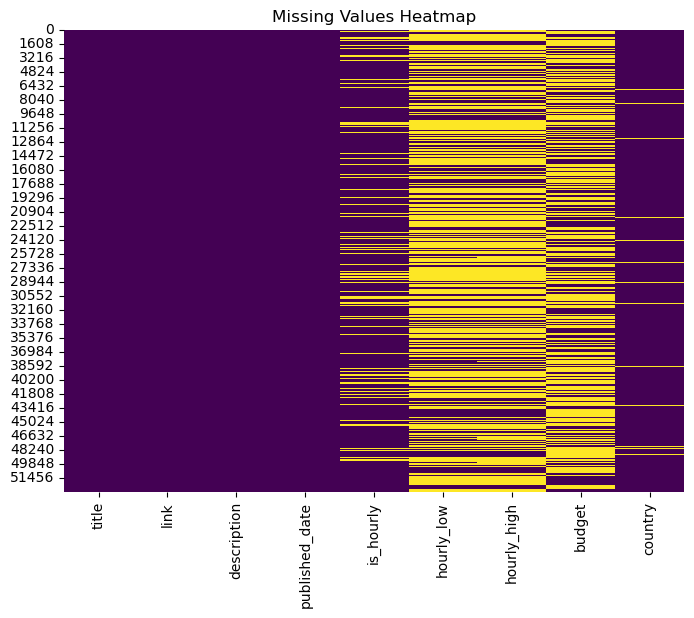

In [88]:
# Visualizing missing values
plt.figure(figsize=(8, 6))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values Heatmap")
plt.show()

In [90]:
# Fill 'is_hourly'
df['is_hourly'] = df['is_hourly'].fillna(0)

# Fill 'hourly_low' and 'hourly_high'
df['hourly_low'] = df.groupby('country')['hourly_low'].transform(lambda x: x.fillna(x.median()))
df['hourly_high'] = df.groupby('country')['hourly_high'].transform(lambda x: x.fillna(x.median()))

# Fill 'budget'
df['budget'] = df.groupby('country')['budget'].transform(lambda x: x.fillna(x.median()))

# Fill 'country'
df['country'] = df['country'].fillna('Unknown')

# Dropping rows with no monetary information
df = df.dropna(subset=['hourly_low', 'hourly_high', 'budget'], how='all')


In [91]:
missing_values

title                 0
link                  0
description           0
published_date        0
is_hourly          8229
hourly_low        30102
hourly_high       30897
budget            31185
country            1141
dtype: int64

In [112]:
df.head(2)

,title,link,description,published_date,is_hourly,hourly_low,hourly_high,budget,country,hourly_avg,budget_segment,hourly_rate_segment,month_year,quarter
1,Full Stack Developer,https://www.upwork.com/jobs/Full-Stack-Develop...,Job Title: Full Stack DeveloperWe are seeking ...,2024-02-17 09:09:17+00:00,False,15.0,35.0,1100.0,United States,25.0,Medium,Low,2024-02,2024Q1
2,SMMA Bubble App,https://www.upwork.com/jobs/SMMA-Bubble-App_%7...,I need someone to redesign my bubble.io site t...,2024-02-17 09:08:46+00:00,True,10.0,30.0,100.0,United States,20.0,Very Low,Very Low,2024-02,2024Q1


### 3. Distributions 
based on Jobs, Hourly rates and Budgets.

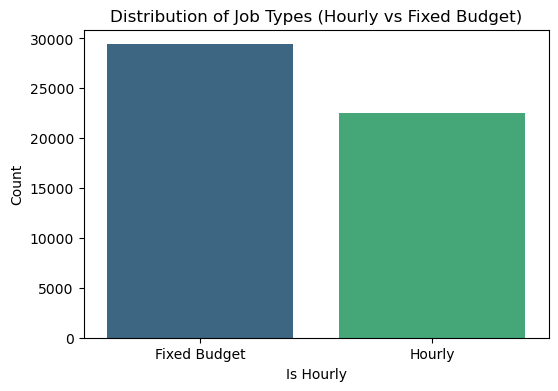

In [93]:
# Job Types
job_type_counts = df['is_hourly'].value_counts()
plt.figure(figsize=(6, 4))
sns.barplot(x=job_type_counts.index, y=job_type_counts.values, palette="viridis")
plt.title("Distribution of Job Types (Hourly vs Fixed Budget)")
plt.xlabel("Is Hourly")
plt.ylabel("Count")
plt.xticks([0, 1], ['Fixed Budget', 'Hourly'])
plt.show()


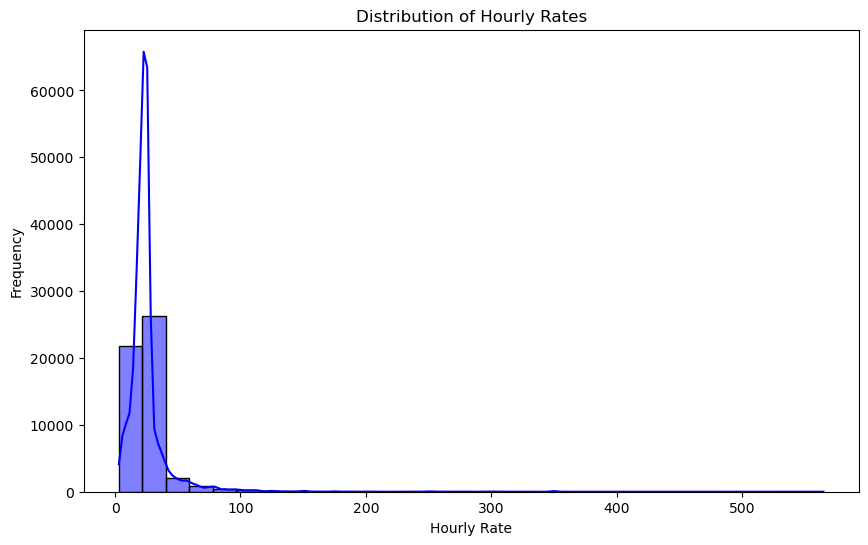

In [113]:
# Distribution of Hourly Rates
df['hourly_avg'] = (df['hourly_low'] + df['hourly_high']) / 2
plt.figure(figsize=(10, 6))
sns.histplot(df['hourly_avg'].dropna(), kde=True, bins=30, color='blue')
plt.title('Distribution of Hourly Rates')
plt.xlabel('Hourly Rate')
plt.ylabel('Frequency')
plt.show()

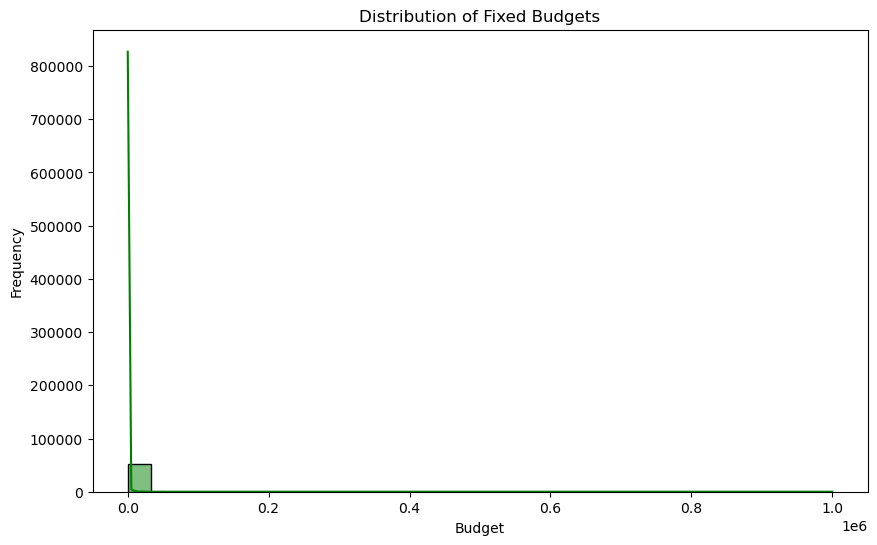

In [114]:
# Distribution of Budgets
plt.figure(figsize=(10, 6))
sns.histplot(df['budget'].dropna(), kde=True, bins=30, color='green')
plt.title('Distribution of Fixed Budgets')
plt.xlabel('Budget')
plt.ylabel('Frequency')
plt.show()

### 4.Segmentation 
based on Budget and Hourly rates

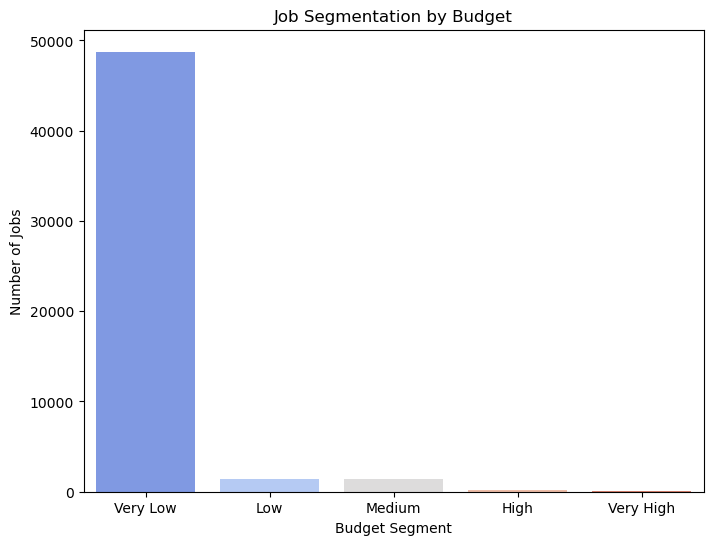

In [96]:
# Budget segmentation
df['budget_segment'] = pd.cut(df['budget'], 
                                bins=[0, 500, 1000, 5000, 10000, float('inf')], 
                                labels=['Very Low', 'Low', 'Medium', 'High', 'Very High'])

# Count by segment
segment_counts = df['budget_segment'].value_counts()
plt.figure(figsize=(8, 6))
sns.barplot(x=segment_counts.index, y=segment_counts.values, palette='coolwarm')
plt.title('Job Segmentation by Budget')
plt.xlabel('Budget Segment')
plt.ylabel('Number of Jobs')
plt.show()


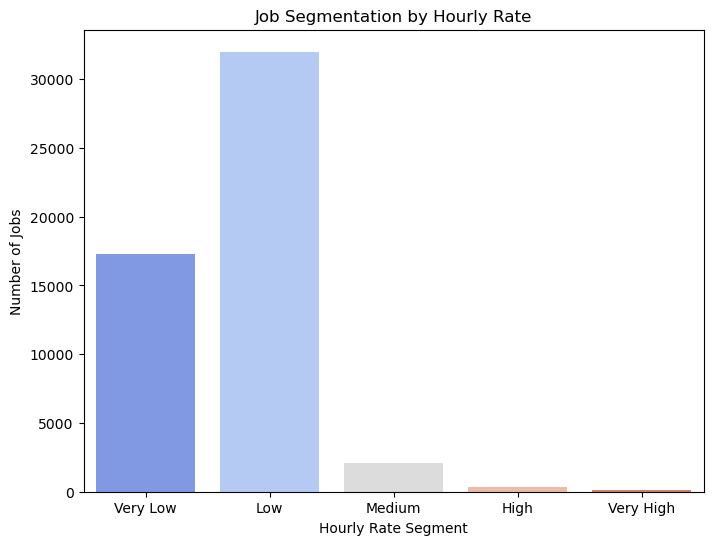

In [115]:
# Hourly rate segmentation
df['hourly_rate_segment'] = pd.cut(df['hourly_avg'], 
                                     bins=[0, 20, 50, 100, 200, float('inf')], 
                                     labels=['Very Low', 'Low', 'Medium', 'High', 'Very High'])

# Count by segment
hourly_segment_counts = df['hourly_rate_segment'].value_counts()
plt.figure(figsize=(8, 6))
sns.barplot(x=hourly_segment_counts.index, y=hourly_segment_counts.values, palette='coolwarm')
plt.title('Job Segmentation by Hourly Rate')
plt.xlabel('Hourly Rate Segment')
plt.ylabel('Number of Jobs')
plt.show()


### 5.Job Trends (over the time)

In [118]:
# Convert published_date to datetime
df['published_date'] = pd.to_datetime(df['published_date'])

# Extract month and year for trends
df['month_year'] = df['published_date'].dt.to_period('M')

# Count jobs per month
job_trends = df['month_year'].value_counts().sort_index()

job_trends

C:\Users\Atharva\AppData\Local\Temp\ipykernel_6760\4099562754.py:5: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df['month_year'] = df['published_date'].dt.to_period('M')


month_year
2023-12        7
2024-01       51
2024-02    51854
Freq: M, Name: count, dtype: int64

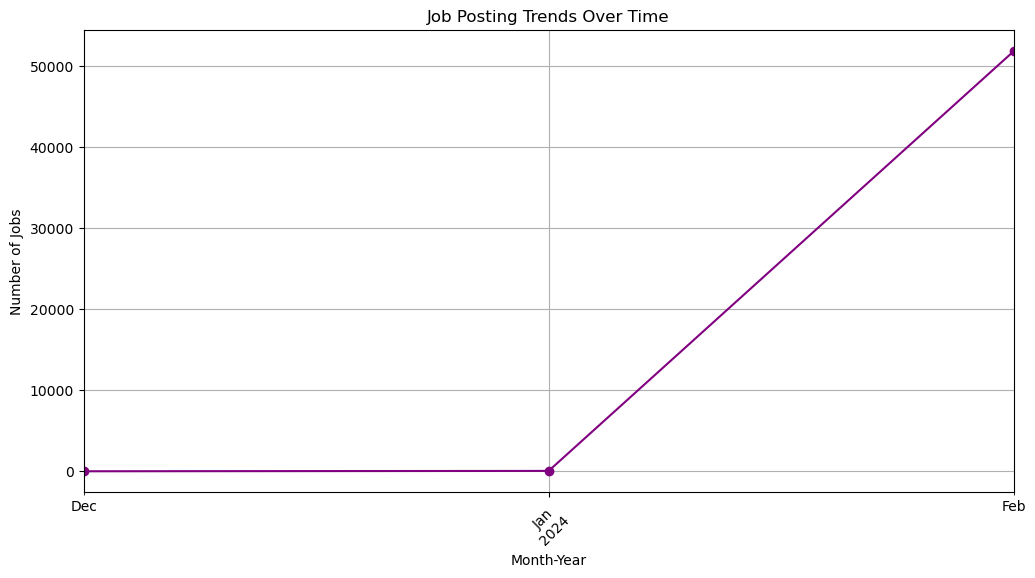

In [119]:
# Plotting the trends
plt.figure(figsize=(12, 6))
job_trends.plot(kind='line', marker='o', color='purple')
plt.title('Job Posting Trends Over Time')
plt.xlabel('Month-Year')
plt.ylabel('Number of Jobs')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()


C:\Users\Atharva\AppData\Local\Temp\ipykernel_6760\3416231839.py:1: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df['quarter'] = df['published_date'].dt.to_period('Q')


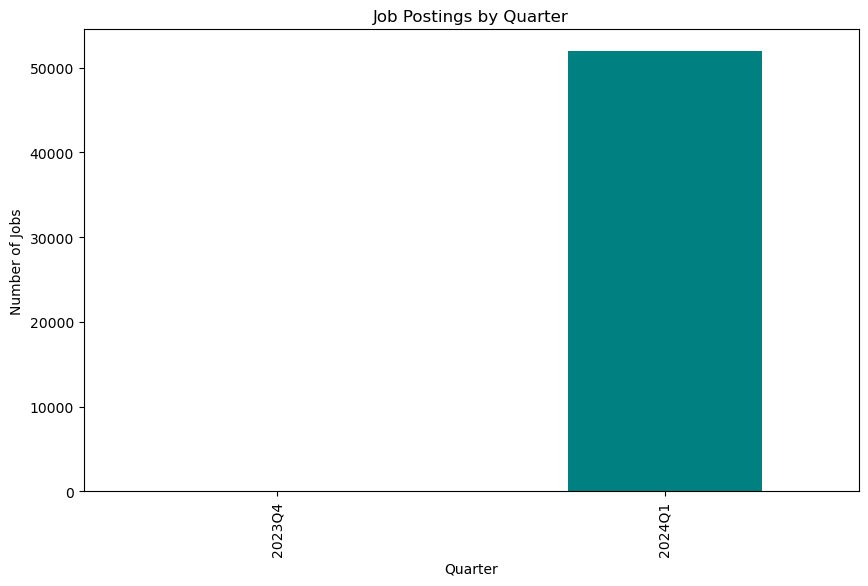

In [120]:
df['quarter'] = df['published_date'].dt.to_period('Q')
quarter_trends = df['quarter'].value_counts().sort_index()
quarter_trends.plot(kind='bar', color='teal', figsize=(10, 6))
plt.title('Job Postings by Quarter')
plt.xlabel('Quarter')
plt.ylabel('Number of Jobs')
plt.show()


### 6. Geographical Analysis

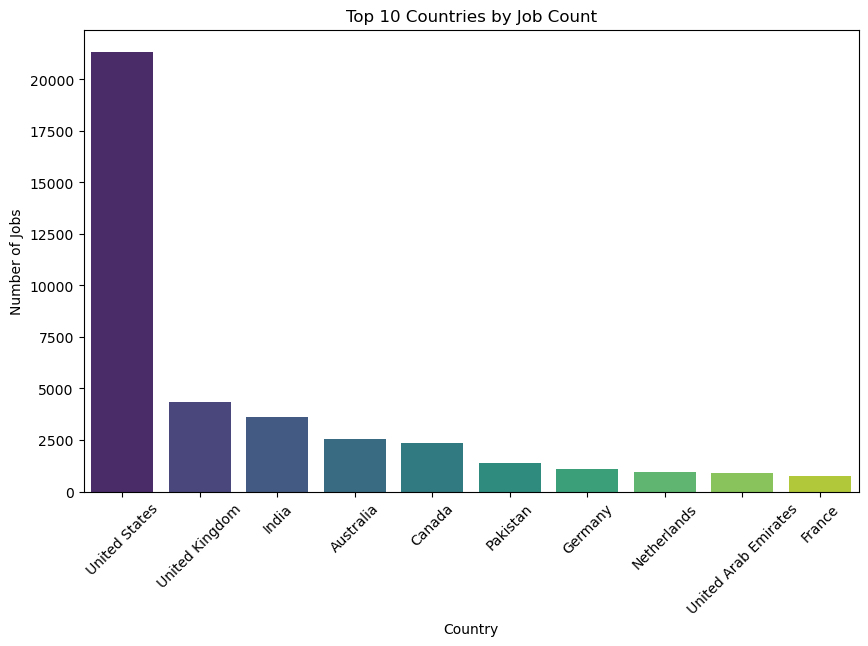

In [121]:
# Top 10 countries by job count
top_countries = df['country'].value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_countries.index, y=top_countries.values, palette='viridis')
plt.title('Top 10 Countries by Job Count')
plt.xlabel('Country')
plt.ylabel('Number of Jobs')
plt.xticks(rotation=45)
plt.show()


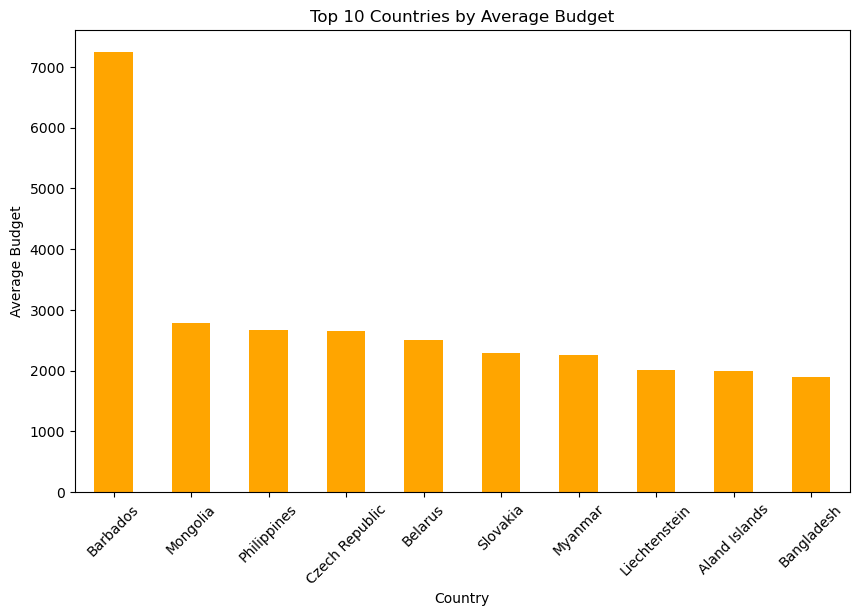

In [137]:
avg_budget_country = df.groupby('country')['budget'].mean().sort_values(ascending=False).head(10)
avg_budget_country.plot(kind='bar', color='orange', figsize=(10, 6))
plt.title('Top 10 Countries by Average Budget')
plt.xlabel('Country')
plt.ylabel('Average Budget')
plt.xticks(rotation=45)
plt.show()

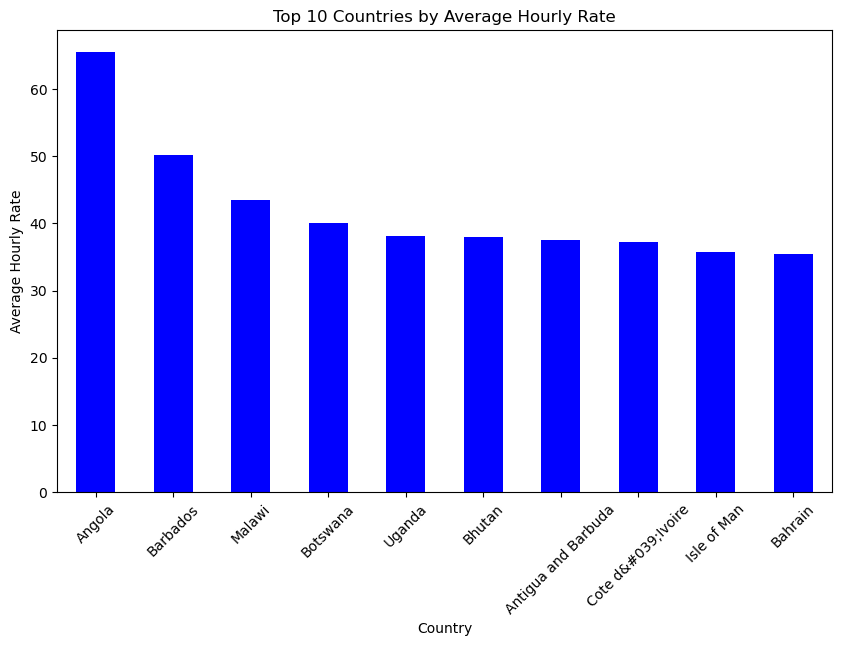

In [136]:
avg_hourly_country = df.groupby('country')['hourly_avg'].mean().sort_values(ascending=False).head(10)
avg_hourly_country.plot(kind='bar', color='blue', figsize=(10, 6))
plt.title('Top 10 Countries by Average Hourly Rate')
plt.xlabel('Country')
plt.ylabel('Average Hourly Rate')
plt.xticks(rotation=45)
plt.show()

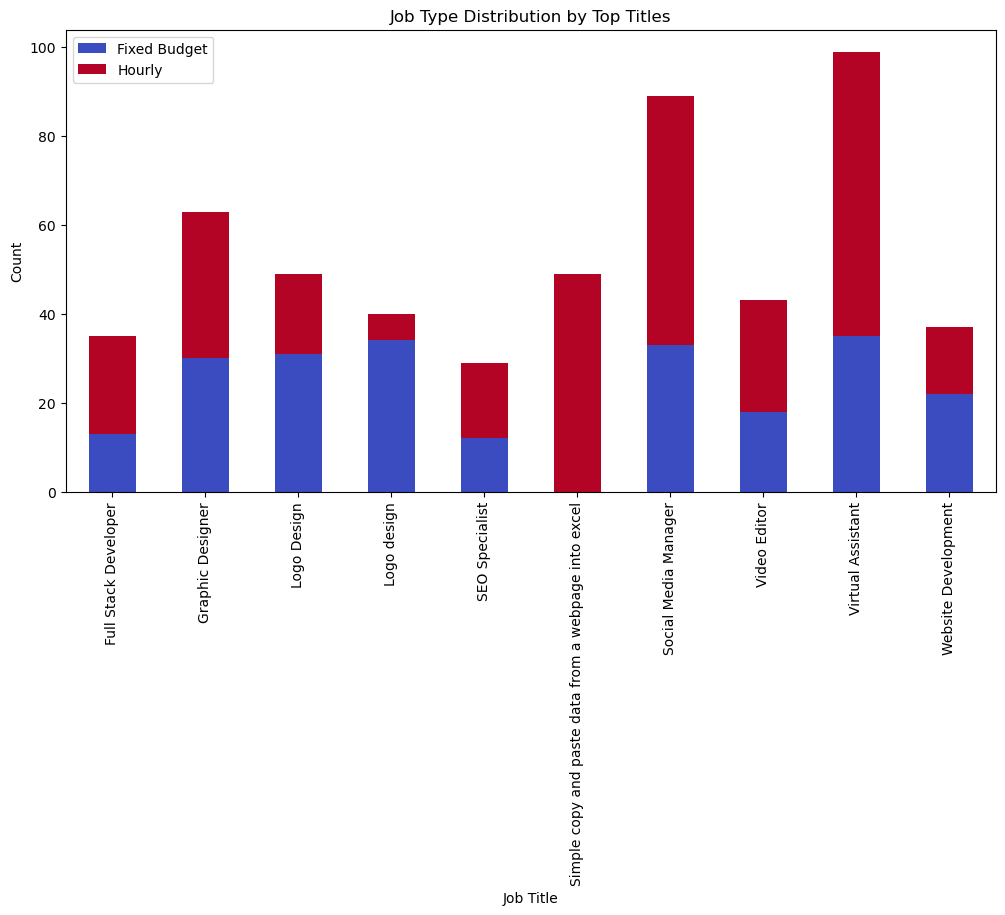

In [124]:
top_titles = df['title'].value_counts().head(10).index
job_type_by_title = df[df['title'].isin(top_titles)].groupby(['title', 'is_hourly']).size().unstack(fill_value=0)

job_type_by_title.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='coolwarm')
plt.title('Job Type Distribution by Top Titles')
plt.xlabel('Job Title')
plt.ylabel('Count')
plt.legend(['Fixed Budget', 'Hourly'])
plt.show()


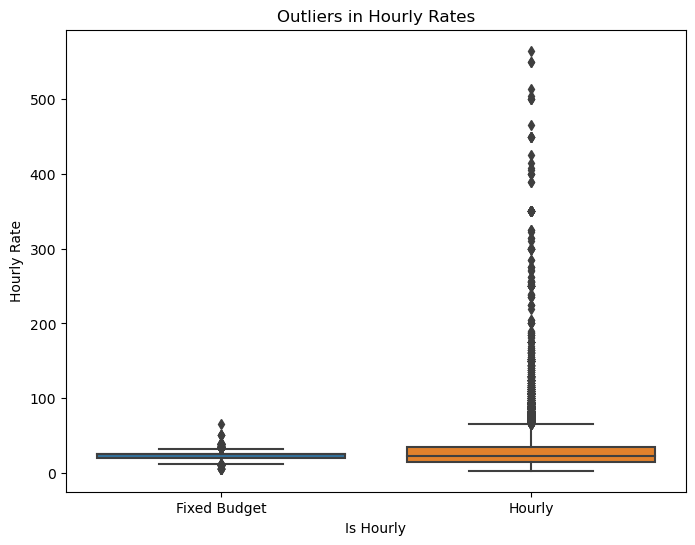

In [138]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='is_hourly', y='hourly_avg', data=df)
plt.title('Outliers in Hourly Rates')
plt.xlabel('Is Hourly')
plt.ylabel('Hourly Rate')
plt.xticks([0, 1], ['Fixed Budget', 'Hourly'])
plt.show()

Correlation between hourly rates and budget:
            hourly_avg    budget
hourly_avg    1.000000  0.015826
budget        0.015826  1.000000


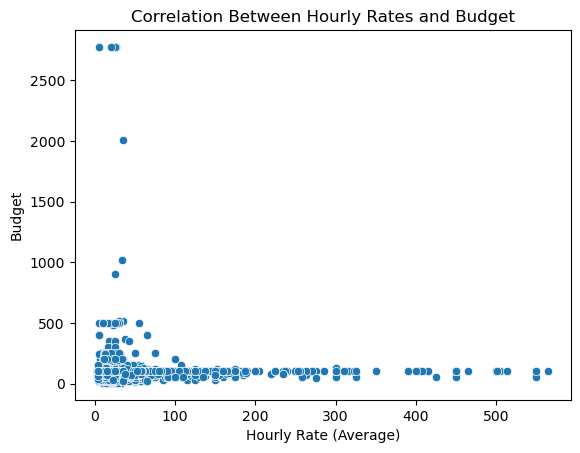

In [139]:
# Filter hourly jobs
hourly_jobs = df[df['is_hourly'] == 1]

# Correlation analysis
correlation = hourly_jobs[['hourly_avg', 'budget']].corr()
print("Correlation between hourly rates and budget:")
print(correlation)

# Visualization
sns.scatterplot(x='hourly_avg', y='budget', data=hourly_jobs)
plt.title('Correlation Between Hourly Rates and Budget')
plt.xlabel('Hourly Rate (Average)')
plt.ylabel('Budget')
plt.show()

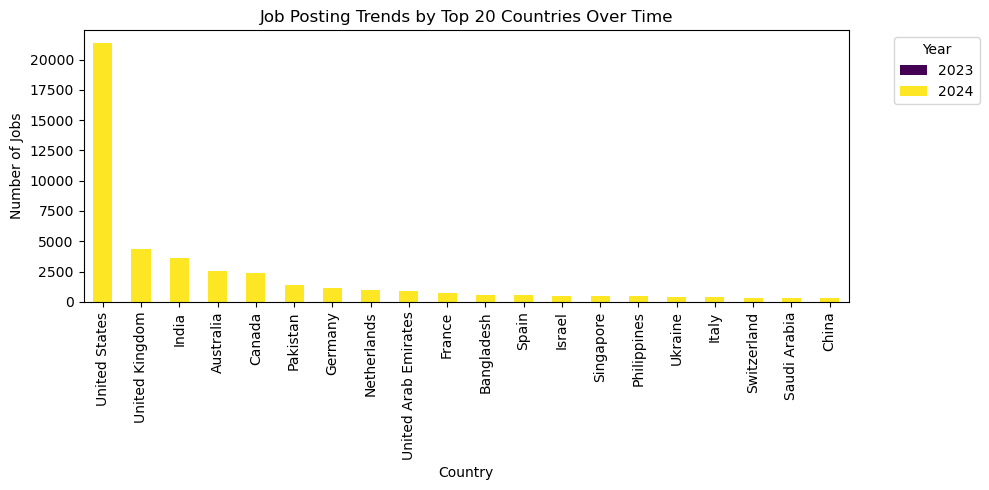

In [140]:
# Group data by country and year
country_trends = df.groupby(['country', df['published_date'].dt.year]).size().unstack(fill_value=0)

# Select top 20 countries by total job postings
top_countries = country_trends.sum(axis=1).sort_values(ascending=False).head(20).index
country_trends_top = country_trends.loc[top_countries]

# Plotting trends for top 20 countries
country_trends_top.plot(kind='bar', stacked=True, figsize=(10, 5), colormap='viridis')
plt.title('Job Posting Trends by Top 20 Countries Over Time')
plt.xlabel('Country')
plt.ylabel('Number of Jobs')
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


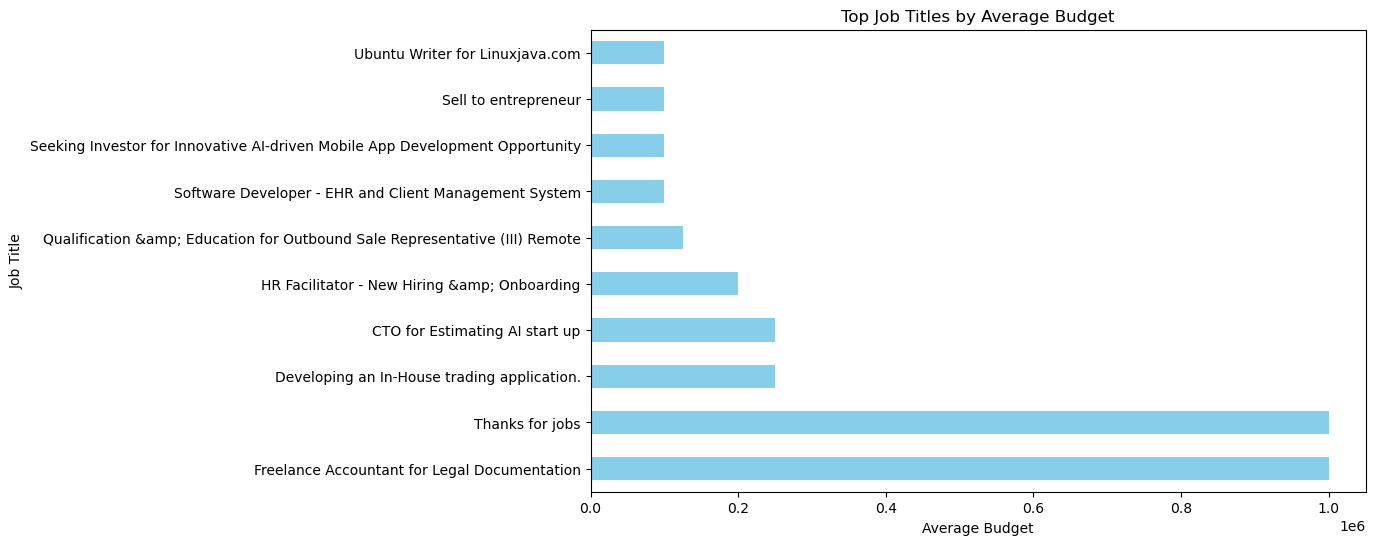

In [141]:
top_titles_budget = df.groupby('title')['budget'].mean().sort_values(ascending=False).head(10)

# Visualization
top_titles_budget.plot(kind='barh', figsize=(10, 6), color='skyblue')
plt.title('Top Job Titles by Average Budget')
plt.xlabel('Average Budget')
plt.ylabel('Job Title')
plt.show()

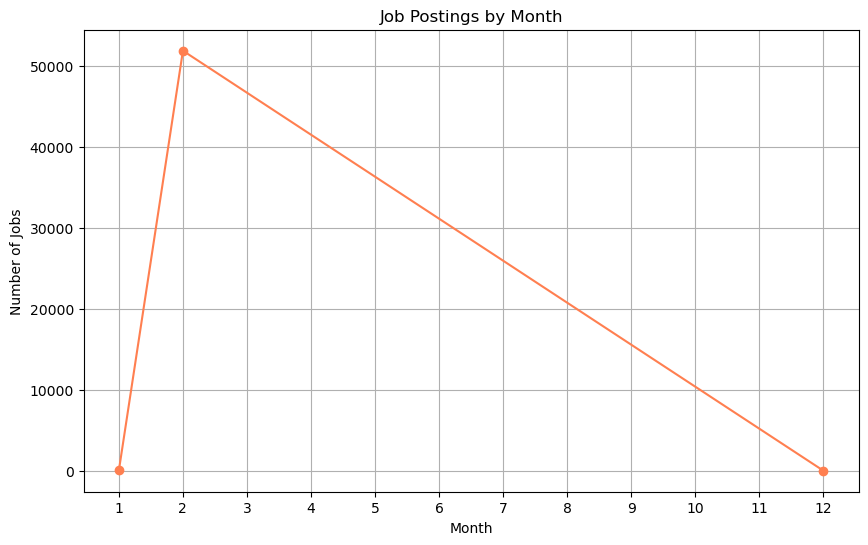

In [142]:
# Extract month from the published_date
df['month'] = df['published_date'].dt.month

# Monthly trends
monthly_trends = df['month'].value_counts().sort_index()

# Visualization
monthly_trends.plot(kind='line', marker='o', figsize=(10, 6), color='coral')
plt.title('Job Postings by Month')
plt.xlabel('Month')
plt.ylabel('Number of Jobs')
plt.xticks(range(1, 13))
plt.grid()
plt.show()